In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1d_data_2018_to_2024-09-06.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_15m_data_2018_to_2024-09-09.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_4h_data_2018_to_2024-09-06.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1h_data_2018_to_2024-09-06.csv


# KÜTÜPHANELERİ IMPORT ETME VE DATA'YI OKUMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore')

In [3]:
file_path = '/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_15m_data_2018_to_2024-09-09.csv' # günlük verileri çekmek istiyorum
# Dosya satır sayısını öğren
with open(file_path, 'r') as file:
    total_lines = sum(1 for line in file)
# Yalnızca sondan 110,000 satırı almak için
nrows = 110000
skip_rows = total_lines - nrows

# Pandas ile dosyayı okuma
df = pd.read_csv(file_path, skiprows=range(1, skip_rows))

In [4]:
df.head() #verinin satırlarını görmek istiyorum fakat içi boş olduğu için sadece ilk 5 satırını

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2021-07-20 21:30:00,29646.27,29714.75,29590.00,29677.00,374.191701,2021-07-20 21:44:59.999,1.109716e+07,7386,229.157850,6.798040e+06,0
1,2021-07-20 21:45:00,29676.99,29763.56,29671.93,29685.98,219.142270,2021-07-20 21:59:59.999,6.511299e+06,5362,94.514854,2.808448e+06,0
2,2021-07-20 22:00:00,29685.97,29761.98,29626.10,29636.78,313.014265,2021-07-20 22:14:59.999,9.290695e+06,6017,138.986200,4.124768e+06,0
3,2021-07-20 22:15:00,29636.78,29692.18,29635.67,29661.30,196.890952,2021-07-20 22:29:59.999,5.840981e+06,4734,109.941584,3.261553e+06,0
4,2021-07-20 22:30:00,29661.30,29679.71,29565.56,29580.06,397.690162,2021-07-20 22:44:59.999,1.177565e+07,6944,206.482790,6.113650e+06,0


In [5]:
df.info() # genel olarak bütün bilgilere ulaşmak istiyorum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open time                     110000 non-null  object 
 1   Open                          110000 non-null  float64
 2   High                          110000 non-null  float64
 3   Low                           110000 non-null  float64
 4   Close                         110000 non-null  float64
 5   Volume                        110000 non-null  float64
 6   Close time                    110000 non-null  object 
 7   Quote asset volume            110000 non-null  float64
 8   Number of trades              110000 non-null  int64  
 9   Taker buy base asset volume   110000 non-null  float64
 10  Taker buy quote asset volume  110000 non-null  float64
 11  Ignore                        110000 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory us

In [6]:
df.isnull().sum() #eksik verileri kontrol etmek istiyorum

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

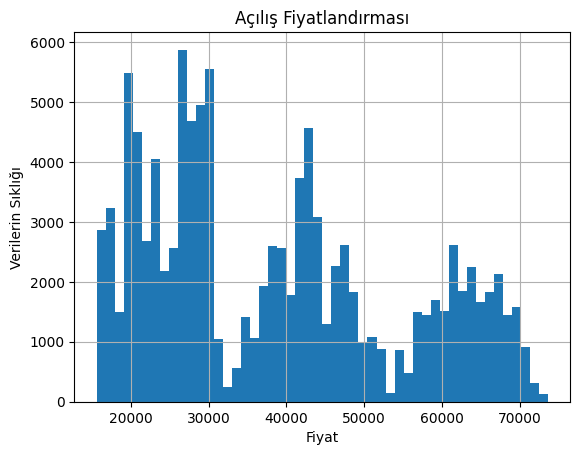

In [7]:
df["Open"].hist(bins=50) #Open sütununu histograma aktarıyorum
plt.title('Açılış Fiyatlandırması')
plt.xlabel('Fiyat') #X eksenine Fiyatları koyar
plt.ylabel('Verilerin Sıklığı') #Bin olarak sıklık(örneğin 50 veri değil 50bin veride bir değişim gözleniyor.)
plt.show()

Bu kod her 50 bin tane gelen veriye göre Bitcoin'in açılış fiyatlarının nasıl dağıldığını gösterir.(örneğin toplamda 200 tane veri 5000 civarında)

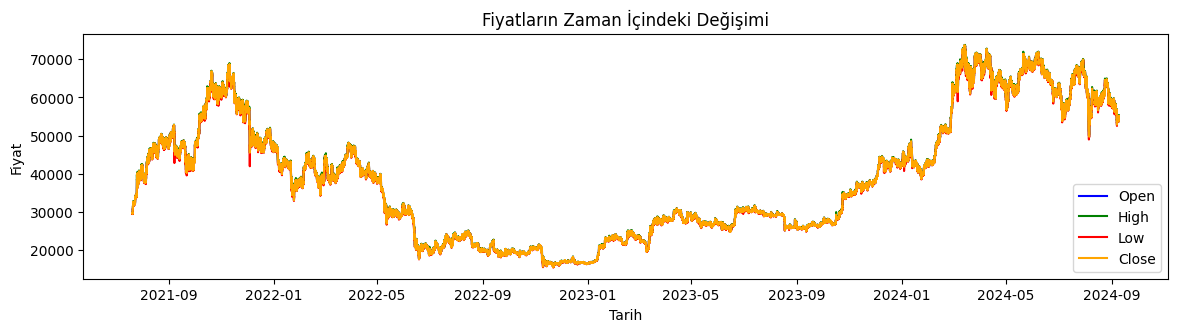

In [8]:
# Zaman serisi verilerini DateTime formatına çevirme
df['Open time'] = pd.to_datetime(df['Open time'])

# Fiyatlar için çizgi grafikleri
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(df['Open time'], df['Open'], label='Open', color='blue')
plt.plot(df['Open time'], df['High'], label='High', color='green')
plt.plot(df['Open time'], df['Low'], label='Low', color='red')
plt.plot(df['Open time'], df['Close'], label='Close', color='orange')
plt.title('Fiyatların Zaman İçindeki Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()



# Grafikleri göster
plt.show()


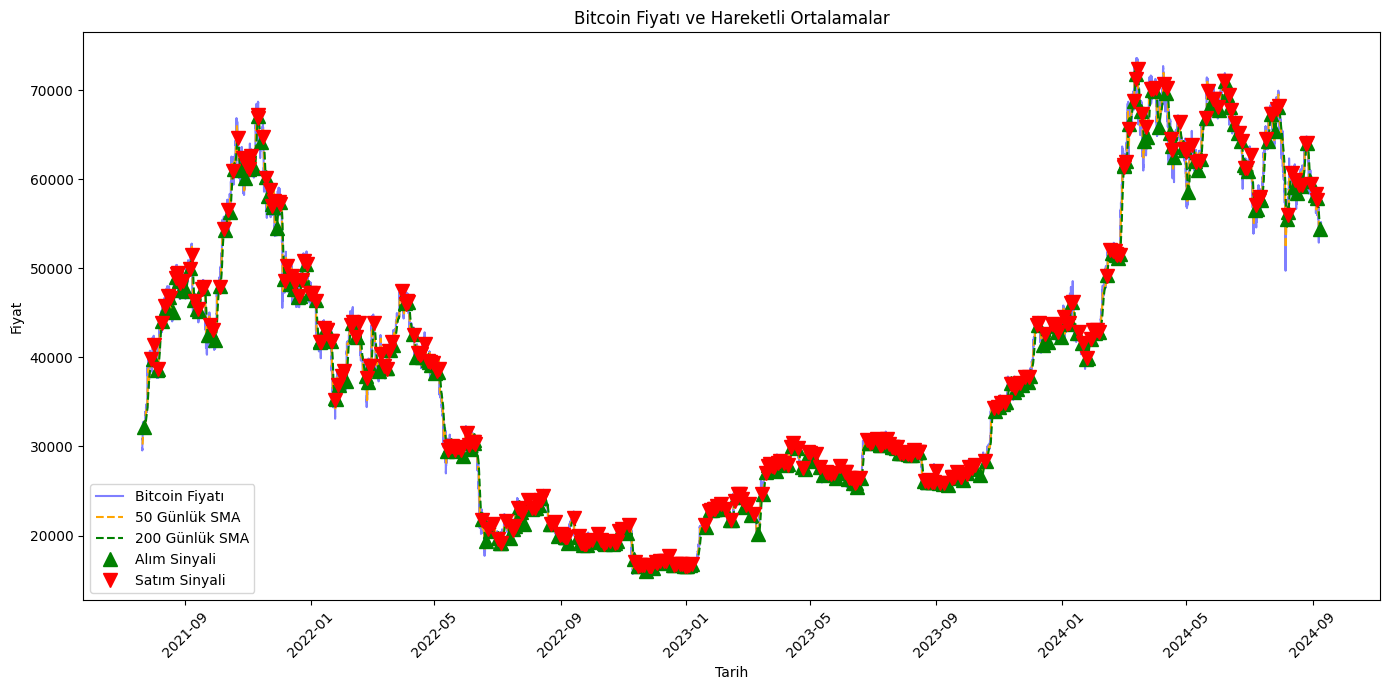

In [9]:
# Tarih sütununu datetime formatına çevir
df['Open time'] = pd.to_datetime(df['Open time'])

# Hareketli Ortalamaları Hesapla
df['SMA50'] = df['Close'].rolling(window=50).mean()  # 50 günlük hareketli ortalama
df['SMA200'] = df['Close'].rolling(window=200).mean()  # 200 günlük hareketli ortalama

# Alım Satım Sinyalleri Üretme
df['Signal'] = 0.0
df['Signal'][50:] = np.where(df['SMA50'][50:] > df['SMA200'][50:], 1.0, 0.0)  # 50 günlüğün 200 günlüğü geçip geçmediğini kontrol et
df['Position'] = df['Signal'].diff()  # Pozisyon değişikliklerini bul

# Grafikleri Görselleştirme
plt.figure(figsize=(14, 7))

# Fiyat grafiği
plt.plot(df['Open time'], df['Close'], label='Bitcoin Fiyatı', color='blue', alpha=0.5)
plt.plot(df['Open time'], df['SMA50'], label='50 Günlük SMA', color='orange', linestyle='--')
plt.plot(df['Open time'], df['SMA200'], label='200 Günlük SMA', color='green', linestyle='--')

# Alım noktalarını göster (SMA50 > SMA200)
plt.plot(df[df['Position'] == 1]['Open time'], df['SMA50'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Alım Sinyali')

# Satım noktalarını göster (SMA50 < SMA200)
plt.plot(df[df['Position'] == -1]['Open time'], df['SMA50'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Satım Sinyali')

plt.title('Bitcoin Fiyatı ve Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.xticks(rotation=45)  # X eksenindeki tarihleri daha düzgün göstermek için
plt.tight_layout()  # Grafik elemanlarının yerleşimini düzenlemek için
plt.show()


**İlk olarak SMA'nın anlamı şudur: Bir finansal veri setinde fiyatların belirli bir sürede(en çok tercih edilenler: 10,20,50,100 veya 200 gündür.) ortalamasını hesaplayan bir gösterge türüdür.**

Burada yeni öğrendiğim hesaplama türü MACD yi kullanıyorum yapay zekadan yardım alarak MACD'yi hesaplıyorum kodumuzun çalışma mantığı şöyle 50 günlük SMA'nın 200 günlük SMA'dan fazla olmaya başladığı zaman bitcoin yükselecek anlamına geliyor. Azalma mantığıda tam tersi şeklinde. Turuncu çizgi grafiği 50 günlük SMA'ları, yeşil ise 200 günlük SMA'ları temsil ediyor.

# VERİ ÖN İŞLEME


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df.dropna(inplace=True) #eksik değerleri temizlemek istiyorum
df.drop(['Open time','Close time','SMA50','SMA200','Ignore','Signal','Position'], axis=1, inplace=True) #Grafik için gerekli fakat skor hesaplama olarak başarı düşüren verileri temizlemek istiyorum

In [12]:
df.columns #silinip silinmediğini kontrol ediyorum

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

In [13]:
Özellikler =['Open','High','Low','Volume','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume']
scaler =StandardScaler()
df[Özellikler]=scaler.fit_transform(df[Özellikler]) #normalleştirdim yani aşırı dengesiz olmasına karşın dengeledim.

In [14]:
df['Hedef_deger']= (df['Close'].shift(-1)>df['Close']).astype(int)
#Kapanış fiyatı bir önceki güne göre yüksekse 1, değilse 0 olarak etiketle

In [15]:
X=df.drop(['Hedef_deger'],axis=1) #Hedef değer ve diğer sütunlar birbirlerinden ayrılıyor
y=df['Hedef_deger']

Veri ön işleme kısmı bu şekilde bitmiş oluyor

# ALGORİTMA SEÇİMİ & HİPERPARAMETRE OPTİMİZASYONU

# * GÖZETİMLİ ÖĞRENME

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model_pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model', LinearRegression())
]) # Linear regresyonlu Pipeline kuruyorum

In [19]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [20]:
y_predLinear = model_pipeline.predict(X_test) #Linear regresyonlu pipeline'ı tahmin için predict metodunu uyguluyorum

In [21]:
msePipeline = mean_squared_error(y_test,y_predLinear) #Linear Regresyonlu pipeline'ı means squared error ile çalıştırıyorum
msePipeline

0.24928172415076252

Burada görüldüğü gibi Linear regresyonlu Pipeline'ın mean squared error skoru 25 dir


In [22]:
model_pipelineRFR=Pipeline([
    ('scaler',StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=50, n_jobs=-1))#RFR büyük veri setlerinde çok yavaş çalıştığı için estimators varsayılanı 100 iken 50 yapıyorum ve işlemcinin bütün gücünü kullanmasına izin veriyorum
])#Burada RandomForestRegressorlu pipeline kuruyorum

In [23]:
model_pipelineRFR.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(n_estimators=50, n_jobs=-1))])

In [24]:
y_predRFR = model_pipelineRFR.predict(X_test)

In [25]:
msePipelineRFR = mean_squared_error(y_test,y_predRFR)
msePipelineRFR

0.2662091204164133

Burada RandomForestRegressorlu pipeline'ın mean squared error skoru 28 çıkıyor yani linear regresyona göre daha başarılı

In [26]:
model =RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)#burada gözetimli öğrenme modeli olarak randomforest'ı seçtim
model.fit(X_train,y_train)# aynı şekilde varsayılan değerleri değiştiriyorum

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1)

X_train ve y_train'i modele "fit" metodu ile uyguluyoruz

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #eğitim ve test kümelerini böldük %20 sini test %80 train'e verdim
y_predict =model.predict(X_test)

X_train ve y_train modelin eğiteleceği verileri içerir
y_train hedef değişkenimizi yani hedef_deger sütununu oluşturur
X_test ve y_test modelin performansını ölçeceği verileri içerir
y_test hedef değişkenimizi içerir

# GÖZETİMLİ ÖĞRENME MODELİ DEĞERLENDİRMESİ

In [28]:
#Tahmin yapma ve değerlendirme bölümü
from sklearn.metrics import mean_squared_error

In [29]:
mse=mean_squared_error(y_test,y_predict) #Mean Squared Error'u burada daha az hata almak için kullandık
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4945585355858112


Burada aslında gözetimsiz öğrenmede daha iyi başarı alacağımı anladım çünkü mean squared error'u zaten hataları indirgemek için kullanmıştım fakat istediğim sonucu alamadım

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# XGBoost Modelini oluşturma
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

XGBoost kullanma sebebim modelimizin performansını ve veri setimizin boyutu dolayısıyla kullandım.

In [31]:
# Accuracy skoru
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
"XGBoost Accuracy Skoru: ",{xgb_accuracy}

('XGBoost Accuracy Skoru: ', {0.5091298210464005})

Skorumuz 49 çıktı başarımız yüksek değil bunun sebebi bitcoin çok fazla değişkene sahip bir dataset örneğin bir adamın ölmesi bile data setimizde büyük bir değişim yaratabiliyor ben burada temel ve basit bir model eğittim. Tabiki bu geliştirilebilir.

In [32]:
# Classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
#Hangi modelin bana daha başarılı bir sonuç vereceğini görmek istiyorum

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     10826
           1       0.52      0.52      0.52     11135

    accuracy                           0.51     21961
   macro avg       0.51      0.51      0.51     21961
weighted avg       0.51      0.51      0.51     21961



In [33]:
#cross validation yapmaya karar verdim
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
"Cross-Validation Ortalama Skoru:",{cv_scores.mean()}

('Cross-Validation Ortalama Skoru:', {0.5069899817850636})

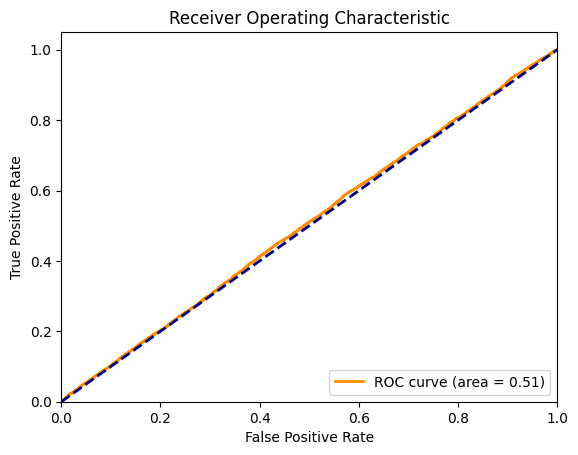

In [34]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisi
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ROC curve ve grafiğimizi yarıya bölen çizgi arasında kalan alan ne kadar 1'e yakınsa o kadar hesaplamamız başarılı demektir. ROC eğrisi, modelinizin sınıflandırma performansını görselleştirmenizi sağlar.

# * GÖZETİMSİZ ÖĞRENME

In [35]:
#Gözetimsiz öğrenme için KMeans modelini seçtim daha uyumlu hale getiriyo
#bunun dışında DBSCAN'i GridSearchCV ile kullanıyorum(karşılaştırma için)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [36]:
Z=df[['Open','High','Low','Close','Volume']] #Özellikler
Z

,Open,High,Low,Close,Volume
199,-0.398196,-0.395963,-0.394279,32276.37,-0.487719
200,-0.395602,-0.395761,-0.393579,32324.51,-0.472756
201,-0.392601,-0.393199,-0.391400,32287.83,-0.470487
202,-0.394903,-0.391270,-0.395588,32213.39,-0.258938
203,-0.399529,-0.391008,-0.396336,32277.66,-0.334706
...,...,...,...,...,...
109995,1.013142,1.023775,1.013769,54943.98,-0.320650
109996,1.017757,1.027509,1.023955,55020.01,-0.439382
109997,1.022498,1.017957,1.018557,54842.63,-0.521175
109998,1.011438,1.019420,1.008938,55045.00,-0.369851


In [37]:
#KMeans'i uygulamaya başlıyorum
kmeans= KMeans(n_clusters=2, random_state=42)
clusters=kmeans.fit_predict(Z) #clusters değişkenine özelliklerimizle oluşturulan bir kmeans modelini fit ediyorum


In [38]:
clusters #burda size clusters değişkenimizin array cinsinde olduğunu ve bir data frame'e ihtiyacı olduğunu gösteriyorum

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
#DataFrame'e ekliyorum
df['Clusters']=clusters
df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Hedef_deger,Clusters
199,-0.398196,-0.395963,-0.394279,32276.37,-0.487719,-0.584467,-0.513558,-0.445950,-0.524161,1,0
200,-0.395602,-0.395761,-0.393579,32324.51,-0.472756,-0.563197,-0.535605,-0.411938,-0.476113,0,0
201,-0.392601,-0.393199,-0.391400,32287.83,-0.470487,-0.559816,-0.545151,-0.448001,-0.526671,0,0
202,-0.394903,-0.391270,-0.395588,32213.39,-0.258938,-0.260881,-0.461477,-0.205223,-0.184365,1,0
203,-0.399529,-0.391008,-0.396336,32277.66,-0.334706,-0.368116,-0.568854,-0.280943,-0.291468,1,0


Son olarak DBSCAN yaparak gözetimsiz öğrenmenin son kümelemesini yapıyorum

In [40]:
#Burada verimi hazırlıyorum ve muhtemelen yaptığım scaler'ı tekrar yapıyorum
ÖzelliklerUS = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[ÖzelliklerUS])


Hiperparametre optimizasyonu yapmaya başlıyorum(GridSearchCV)

In [41]:
# DBSCAN modelini oluşturma
dbscan = DBSCAN()

# Hiperparametreleri belirleme
param_grid = {
    'dbscan__eps': [0.1, 0.3],
    'dbscan__min_samples': [5, 10]
}

# Pipeline oluşturma
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dbscan', DBSCAN())
])

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_scaled)

# En iyi hiperparametrelerle model
best_dbscan = grid_search.best_estimator_.named_steps['dbscan']
best_params = grid_search.best_params_

# En iyi model ile tahmin yapıyorum
labels = best_dbscan.fit_predict(X_scaled)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


# GÖZETİMSİZ ÖĞRENME MODELİ DEĞERLENDİRMESİ

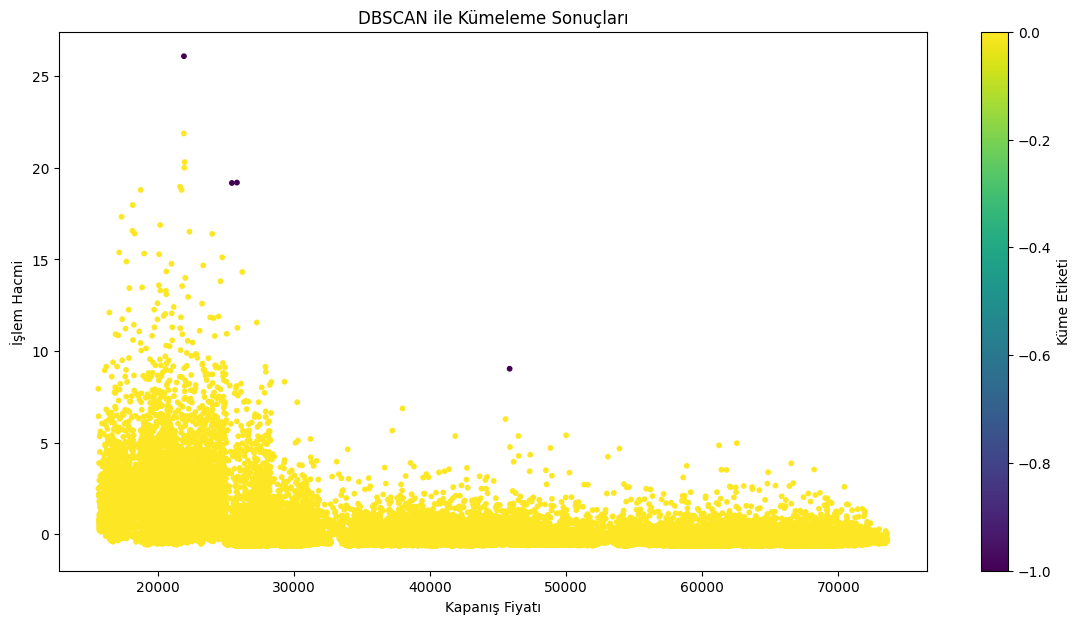

Silhouette Skoru: 0.337


In [42]:
# Kümeleri görselleştirme
plt.figure(figsize=(14, 7))
plt.scatter(X['Close'], X['Volume'], c=labels, cmap='viridis', s=10)
plt.title('DBSCAN ile Kümeleme Sonuçları')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('İşlem Hacmi')
plt.colorbar(label='Küme Etiketi')
plt.show()

# Silhouette Skoru (Kümeler arası ayrımı ölçmek için)
if len(set(labels)) > 1:  # Kümelerin sayısı 1'den fazlaysa
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Skoru: {score:.3f}")
else:
    print("Yalnızca bir küme bulundu. Silhouette skoru hesaplanamaz.")

Burada gördüğümüz gibi insanlar bitcoin fiyatı 15000 ile 28000 arası olduğunda daha çok işlem yapmışlar artı olarak DBSCAN kümelemesi bizim verimiz için daha verimsiz ve çok düşük bir başarı oranı olduğunu görebiliriz sebebi KMeans kümelemesinde silhoutte skorumuzun daha yüksek olması

In [43]:
# KMeans kümelemesini Silhouette Skoru ile Hesaplamayı deneyeceğim
from sklearn.metrics import silhouette_score

In [44]:
Z_sample, _, clusters_sample, _ = train_test_split(Z, clusters, test_size=0.7, random_state=42)
silhouette_avg = silhouette_score(Z_sample, clusters_sample) #Veri setinin sadece %30'unu kullan
"Silhouette Skoru:",{silhouette_avg}

('Silhouette Skoru:', {0.624813077725792})

Burada anlıyoruz ki verimiz gözetimsiz öğrenmede KMeans'e göre yatkın ve normalde 48-52 arası olan başarımız 62'e çıkıyor

In [45]:
print(f"Küme İçi Hata Kareleri Toplamı (Inertia): {kmeans.inertia_}")

Küme İçi Hata Kareleri Toplamı (Inertia): 7277163947205.579


Burada intertia değerimizin yüksek çıkma sebebi özelliğimizin (0-1) aralığında, diğerleri milyonlar seviyesinde olabilir. İntertia'da doğal olarak ortaya yüksek çıkar.

# FİNAL

**Verimizi işledik ve başarı oranları, çıkan sonuçlarımız, analiz grafiklerimize göre Datamızı için gözetimsiz öğrenme kullanmamızın daha uygun olduğu düşüncesine varıyoruz. Bu projede kullanılanlar:**

Gözetimli Öğrenme
Linear Regresyon:
Model: Linear Regression
Performans: Ortalama Kare Hata (MSE) hesaplandı.

Random Forest Regressor:
Model: RandomForestRegressor
Performans: Ortalama Kare Hata (MSE) hesaplandı. 

Random Forest Classifier:
Model: RandomForestClassifier
Performans: Doğruluk Skoru ve ROC Eğrisi hesaplandı.

XGBoost:
Model: XGBClassifier
Performans: Doğruluk Skoru ve Sınıflandırma Raporu hesaplandı.

Gözetimsiz Öğrenme
KMeans Kümeleme:
Model: KMeans
Kümeler belirlendi ve Silhouette Skoru hesaplandı.

DBSCAN Kümeleme:
Model: DBSCAN
Hiperparametre optimizasyonu yapıldı ve kümeler belirlendi.
Sonuçlar ve Değerlendirme

**Gözetimli öğrenme'de düşük başarı oranı almamızın sebebi değişkenlerimizin çok olması ve kriptonun bir çok şeyden etkilenmesidir.**

**Gözetimsiz öğrenmede ise olan bilgilere göre kümeleme ve tahmin yapıldığı için daha başarılı bir sonuç aldık.**